In [1]:
# Input info
#outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/minC5_corr.Kendall.b/"
#outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/comparisons_subsamples"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap/minC5_corr.Kendall.b/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
use_input = False
min_cell = 5
input_col = "Input"
corr_method = "kendall_b"

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np
from mplh.fig_utils import helper_save as hs

import networkx as nx

fig_utils from mplh


In [3]:
sns.set(font_scale = 1.3)


In [4]:
norm_corr_df = pd.read_csv(join(outdir, "norm_correlation.csv"), index_col=0)

In [5]:
# def keep_top_clones(df, n_top=None, min_cell=0):
#     df = df.sort_values("ncells",ascending=False)
#     if n_top is not None:
#         df = df[:n_top]
#     return df.loc[df["ncells"]>min_cell]

# def get_clone_count(x, clone_counts):
#     curr = clone_counts[clone_counts["name"]==x.name]
#     return curr.set_index("nuclear_clusters")["ncells"]


# se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
# if "cluster_labels" in se_cells_meta.columns:
#     se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
# else:
#     se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

# palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
# hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
# color_d = {key:val for key, val in zip(hue_order, palette)}

# ### Remove None before normalizing
# if use_input:
#     se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
# se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
# se_cells_meta

# clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clone_counts = clone_counts[~(clone_counts["name"]=="None")]
# clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")

# clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)

# log2_clone_counts_df = clone_counts_df.copy()
# log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])
# log2_clone_counts_df



# ## Fate correlation

# ## Get top, middle, and bottom 2 correlations - Conditions combined

# def repr_vals(x, n=2):
#     """Get top, middle, and bottom 2 correlations - Conditions combined
    
#     Assumes values are sorted
#     """
#     x_len = len(x)
#     top = x[:min(len(x),n)]
#     bot = []
#     if x_len >= n*2:
#         bot = x[::-1][:n]
#         mid = []
#         if x_len >= n*3:
#             mid = x[int((len(x)/2)-(n/2)): int((len(x)/2)+(n/2))]
#     return np.concatenate((top, bot, mid))


# def top_vals(x, n=5):
#     """Assumes values are sorted"""
#     x_len = len(x)
#     return x[:min(len(x),n)]


# def repr_df(corr_vals, all_corr_df):
#     repr_corr = all_corr_df.isin(corr_vals)
#     repr_corr_inds = repr_corr[repr_corr > 0].stack().index.tolist()
#     repr_corr_inds_df = pd.DataFrame(repr_corr_inds)
#     repr_corr_inds_df["nm"] = repr_corr_inds_df.apply(lambda x: "-MERGE-".join(np.sort(x.values)), axis=1)

#     repr_corr_inds_df = repr_corr_inds_df.loc[~(repr_corr_inds_df.duplicated(subset=["nm"]))].drop("nm", axis=1)
#     repr_corr_inds_df["spearman corr"] = repr_corr_inds_df.apply(lambda x: all_corr_df.loc[x[0], x[1]], axis=1)
#     repr_corr_inds_df = repr_corr_inds_df.sort_values("spearman corr")[::-1]
#     return repr_corr_inds_df

# def corr_df_flatten(df):
#     vals = np.sort(list(set(df.values.flatten())))[::-1]
#     return vals[vals!=1] # remove the diagonals

# def plot_repr_corr(df, all_corr_df, label, top=False, out_f=None):
#     vals = corr_df_flatten(all_corr_df)
#     if top:
#         corr_vals = top_vals(vals, n=5) #top, middle, and bottom n correlations
#     else:
#         corr_vals = repr_vals(vals, n=2) #top, middle, and bottom n correlations
#     repr_corr_inds_df = repr_df(corr_vals, all_corr_df)
#     corr_cat_df = []
#     for ind, val in repr_corr_inds_df.iterrows():
#         curr = df.loc[:,[val[0], val[1]]].copy()
#         curr["comp"] = f'{"__".join(curr.columns)} ({corr_method} r={val["spearman corr"]:.3f})'
#         curr = curr.rename({val:str(ind) for ind, val in enumerate([val[0], val[1]])}, axis=1)
#         corr_cat_df.append(curr)
        
#     g = sns.lmplot(data=pd.concat(corr_cat_df,axis=0), x="0", y="1", hue="comp", height=12);
#     plt.ylabel(label)
#     plt.xlabel(label)
#     plt.suptitle("Top, middle, and bottom 2 paired correlations")
#     if top:
#         plt.suptitle(f"Top 5 paired correlations")
#     if out_f is not None:
#         hs(out_f, to_pdf=True)
#     return corr_cat_df

# from scipy.stats import kendalltau
# def kendalltau_b(x,y):
#     #print('kendall', kendalltau(x, y, variant='b'))
#     return kendalltau(x, y, variant='b')[0]

# def get_corr(df, corr_method):
#     df = df.copy().drop(["ncells", "donor"],axis=1, errors='ignore')
#     if corr_method == "spearman":
#         return df.corr(method="spearman")
#     elif corr_method == "kendall_b":
#         return df.corr(method=kendalltau_b)



# ### a) Donors in sequenced run combined (min_cell)

# filt_clone_counts_df = keep_top_clones(clone_counts_df, min_cell=min_cell)

# all_corr_df = get_corr(filt_clone_counts_df, corr_method)
# # if corr_method == "spearman":
# #     all_corr_df = np.log2(1+filt_clone_counts_df.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
# # elif corr_method == "kendall_b":
# #     all_corr_df = np.log2(1+filt_clone_counts_df.drop(["ncells", "donor"],axis=1)).corr(method=kendalltau_b)


# all_corr_df
# sns.clustermap(all_corr_df)
# plt.suptitle(f"allDonors (clone size > {min_cell})")


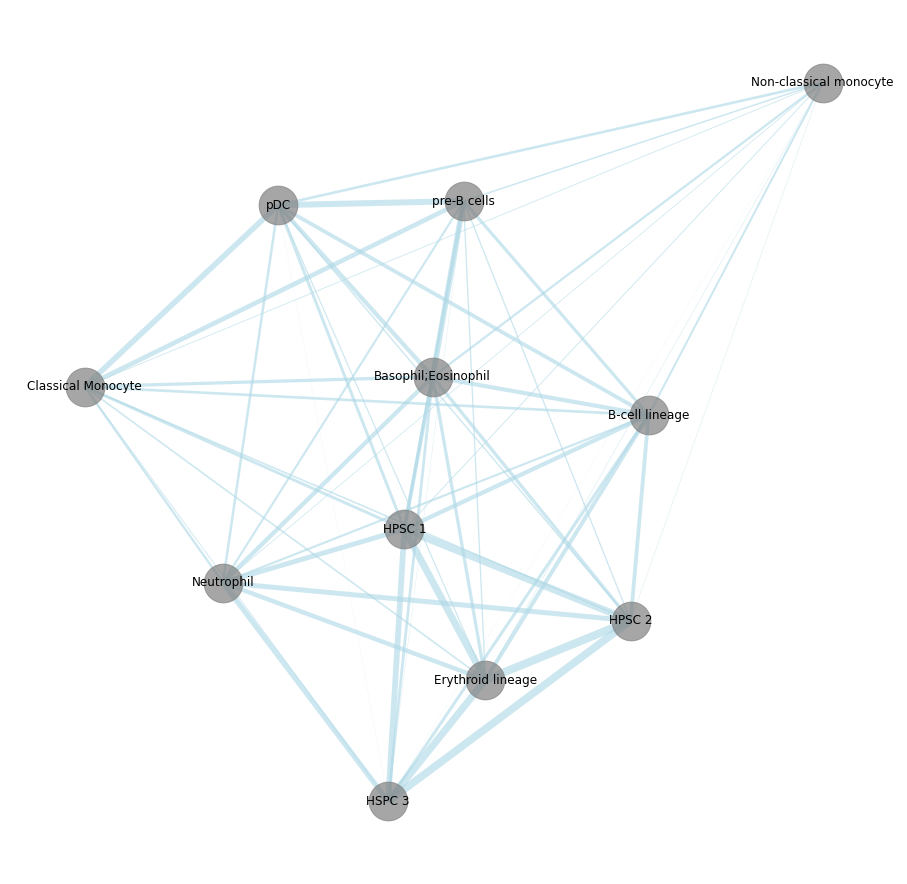

In [6]:
edges = norm_corr_df.reset_index().melt(id_vars=["index"]).rename({"index":"edgeA", "variable":"edgeB"}, axis=1)

G = nx.Graph()
for ind, val in edges.iterrows():
    if val["edgeA"] != val["edgeB"]:
        G.add_edge(val["edgeA"], val["edgeB"], weight=val["value"]*10)

widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(16,16))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='grey',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='lightblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
hs(join(outdir, "fate_corr_network.png"), to_pdf=True)
plt.show()

### b) Separate donors, min_cell=min_cell

In [7]:
# for don, val in clone_counts_df.groupby("donor"):
#     tmp = keep_top_clones(val, min_cell=min_cell)
#     #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
#     corr_df = get_corr(tmp, corr_method)
#     corr_df

#     sns.clustermap(corr_df)
#     plt.suptitle(f"Donor {don} (clone size > {min_cell})")
#     hs(join(outdir, f"fateCorr_donor{don}.png"), to_pdf=True)


# ### c) Separate donors, min_cell is 50

# for don, val in clone_counts_df.groupby("donor"):
#     tmp = keep_top_clones(val, min_cell=50)
#     #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
#     corr_df = get_corr(tmp, corr_method)
#     corr_df

#     sns.clustermap(corr_df)
#     plt.suptitle(f"Donor {don} (clone size > 50)")

## Separate donors, no min_cell

# for don, val in clone_counts_df.groupby("donor"):
#     tmp = keep_top_clones(val, min_cell=0)
#     #corr_df = np.log2(1+val.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
#     corr_df = get_corr(val, corr_method)
#     sns.clustermap(corr_df)
#     plt.suptitle(f"Donor {don} (all clones)")

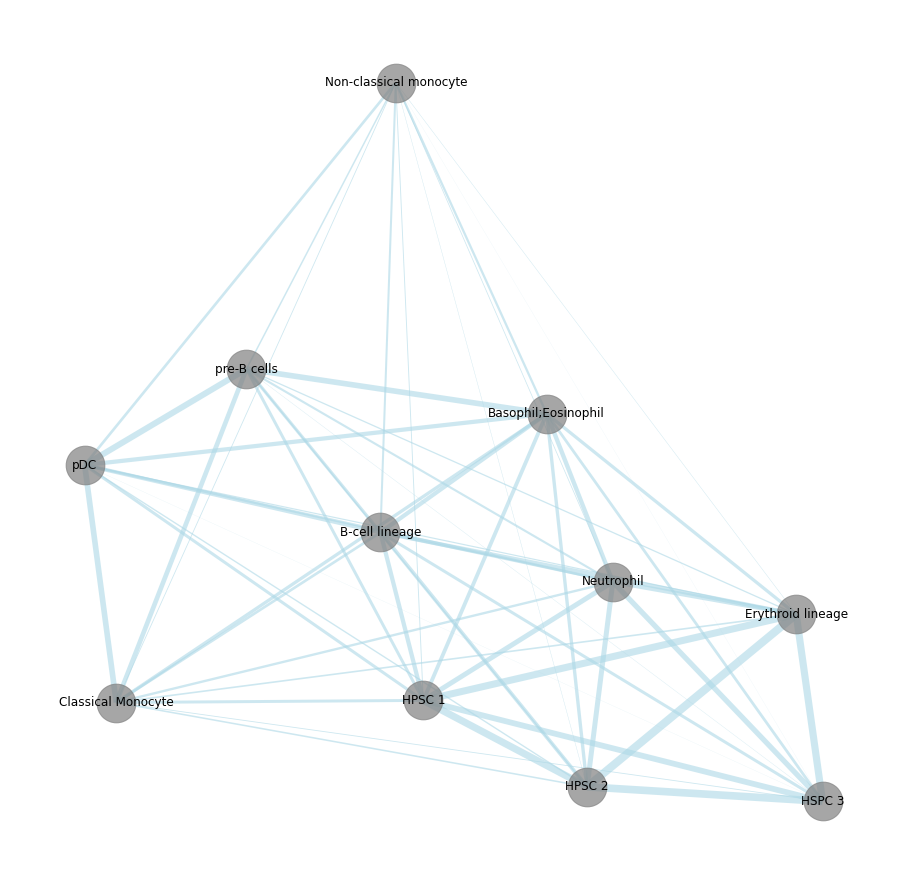

<Figure size 432x288 with 0 Axes>

In [14]:
edges = norm_corr_df.reset_index().melt(id_vars=["index"]).rename({"index":"edgeA", "variable":"edgeB"}, axis=1)
edges["norm_value"] = edges["value"]/edges["value"].mean()
edges

G = nx.Graph()
for ind, val in edges.iterrows():
    if val["edgeA"] != val["edgeB"]:
        G.add_edge(val["edgeA"], val["edgeB"], weight=val["value"]*10)

widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(16,16))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='grey',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='lightblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()
hs(join(outdir, "norm_fate_corr_network.png"), to_pdf=True)

---

---

In [ ]:
outdir